SPRINT S8-1

Nivel 1

Realiza la conexión en Python con MySQL Workbench para cargar toda la información que tienes en las tablas.

Realizarás una visualización para cada ejercicio. Comenta lo que llama la atención de graficar esta variable, justifica la elección del gráfico e interpreta los resultados en función de tus datos.

Instalamos las los conectores y librerias que necesitaremos

In [3]:
%pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install scipy numpy

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
import statistics
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
import mysql.connector

In [2]:
from datetime import date,timedelta
from datetime import datetime

In [3]:

try:
    conexion = mysql.connector.connect(
        host='localhost',
        user='root',
        password='Ainhoa2011.',
        database='transacciones')

    cursor = conexion.cursor()
    print("Conexión exitosa a la base de datos.")

    cursor.execute("SHOW TABLES")
    tablas = [tabla[0] for tabla in cursor.fetchall()]
    print("Tablas encontradas:", tablas)

    # Función para cargar tablas
    def cargar_tabla(nombre_tabla):
        cursor.execute(f"SELECT * FROM {nombre_tabla}")
        return pd.DataFrame(cursor.fetchall(), columns=[col[0] for col in cursor.description])

    # Cargar tablas
    df_companies = cargar_tabla("companies")
    df_users = cargar_tabla("users")
    df_credit_cards = cargar_tabla("credit_cards")
    df_activ_card = cargar_tabla("activ_card")
    df_products = cargar_tabla("products")
    df_transactions = cargar_tabla("transactions")
    df_trans_product = cargar_tabla("trans_product")

    cursor.close()
    conexion.close()

except mysql.connector.Error as err:
    print(" Error de conexión a la base de datos: {err}")

Conexión exitosa a la base de datos.
Tablas encontradas: ['activ_card', 'companies', 'credit_cards', 'products', 'trans_product', 'transactions', 'users']


Limpieza y transformacion:

Transformamos los tipos de la columna amount a float

In [4]:
df_transactions.dtypes

id                     object
card_id                object
business_id            object
timestamp      datetime64[ns]
amount                 object
declined                int64
product_ids            object
user_id                 int64
lat                   float64
longitude             float64
dtype: object

In [5]:
df_transactions['amount'] = df_transactions['amount'].astype(float)
df_transactions['declined'] = df_transactions['declined'].astype('category')

Transformamos en df_products, los tipos de las columnas weight y price a float

In [6]:
df_products.dtypes

id               int64
product_name    object
price           object
colour          object
weight          object
warehouse_id    object
dtype: object

In [7]:
# Antes de cambiar el tipo, debemos hacer una limpieza en la columna price de df_products, el primer digito es el simbolo '$'
# solo obtenemos el valor numerico
df_products['price'] = df_products['price'].str[1:]

In [8]:
df_products['weight'] = df_products['weight'].astype(float)
df_products['price'] = df_products['price'].astype(float)

In [9]:
df_products[['colour', 'warehouse_id']] = df_products[['colour', 'warehouse_id']].astype('category')

In [10]:
df_products.dtypes

id                 int64
product_name      object
price            float64
colour          category
weight           float64
warehouse_id    category
dtype: object

Transformar el tipo de object a categorico

In [11]:
df_companies['country'] = df_companies['country'].astype('category')
df_companies.dtypes

company_id        object
company_name      object
phone             object
email             object
country         category
website           object
dtype: object

In [12]:
df_users['country'] = df_users['country'].astype('category')
df_users['birth_date'] = df_users['birth_date'].astype('datetime64[ns]')


In [13]:
#agregamos una nuevas dimensiones: de 'fecha actual' para obtener la columna 'edad' a la tabla df_users
df_users['fecha_actual']= date.today()
df_users['fecha_actual'] = df_users['fecha_actual'].astype('datetime64[ns]')

df_users['edad'] = (df_users['fecha_actual'] - df_users['birth_date'])/ pd.Timedelta(days=365.25)
df_users['edad'] = df_users['edad'].astype(int)
df_users.dtypes

id                       int64
name                    object
surname                 object
phone                   object
email                   object
birth_date      datetime64[ns]
country               category
city                    object
postal_code             object
address                 object
fecha_actual    datetime64[ns]
edad                     int64
dtype: object

In [14]:
palette = ['#2929e4', '#e12027', '#2a9d8f', '#8338ec', '#e12027', '#fb5607', '#3a86ff', '#94944c', '#fd8a09', '#ffbe0b', '#ff006e']

- Exercici 1

Una variable numèrica.

In [15]:
df_trans_exitosas = df_transactions[df_transactions['declined']== 0].sort_values(by= 'amount',ascending= False)
df_trans_exitosas.head()

,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude
74,263035AA-8758-E413-8CC4-6D8F81BBF899,CcU-4338,b-2302,2021-06-21 11:23:01,499.23,0,"53, 31, 83, 29",223,36.61000,83.19530
34,1753A288-9FC1-52E6-5C39-A1FFB97B0D3A,CcU-4345,b-2302,2021-08-17 05:32:08,497.84,0,"1, 13, 89, 31",222,57.94220,-114.72900
103,360C7814-F7AF-B43A-0946-AB38D2683C86,CcU-2994,b-2326,2021-08-21 10:19:58,494.82,0,"7, 19, 79",116,-7.93005,-79.07330
37,17B43AB2-DD7D-96C4-2C7D-1989F119A1CB,CcU-4814,b-2278,2021-08-28 20:01:52,494.17,0,"29, 11",199,5.41804,-6.70932
189,5E6EC264-1D42-EE1D-870A-497C85828A6A,CcU-3666,b-2618,2022-01-31 12:01:11,492.42,0,"5, 29",267,66.90370,33.44470


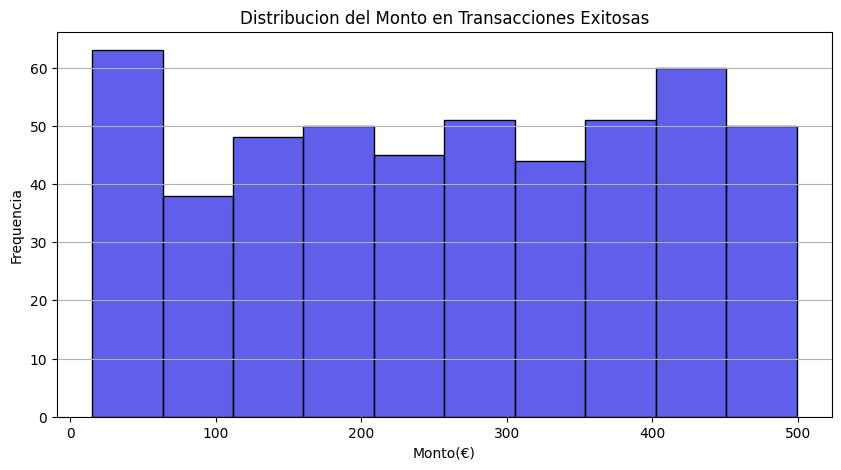

In [16]:
f, ax = plt.subplots(figsize = (10,5))
sns.histplot(df_trans_exitosas['amount'], color='#2929e4')
plt.title('Distribucion del Monto en Transacciones Exitosas')
plt.xlabel('Monto(€)')
plt.ylabel('Frequencia')
plt.grid(True, axis='y')

Se ha graficado la variable numérica Monto utilizando un histograma (histplot), donde el eje x representa los rangos de valores del monto y el eje y muestra la 
frecuencia (número de transacciones) dentro de cada rango.

Observaciones:

- Los montos de las transacciones se encuentran en un rango que va aproximadamente desde 15 euros hasta cerca de 500 euros.
- La distribución presenta múltiples picos, lo que sugiere una distribución multimodal. Se observan concentraciones significativas en:
    . Montos entre 0 y 50 euros, y
    . Montos entre 400 y 450 euros.
- No se identifican outliers evidentes, es decir, no hay valores que se alejen de forma considerable del resto de los datos.

Justificación del gráfico:

Se utiliza el gráfico de tipo histplot porque permite representar adecuadamente una variable numérica continua, esta visualización es útil para detectar 
concentraciones, dispersiones y posibles valores atípicos en el catálogo.

- Ejercicio 2

Dos variables numéricas.

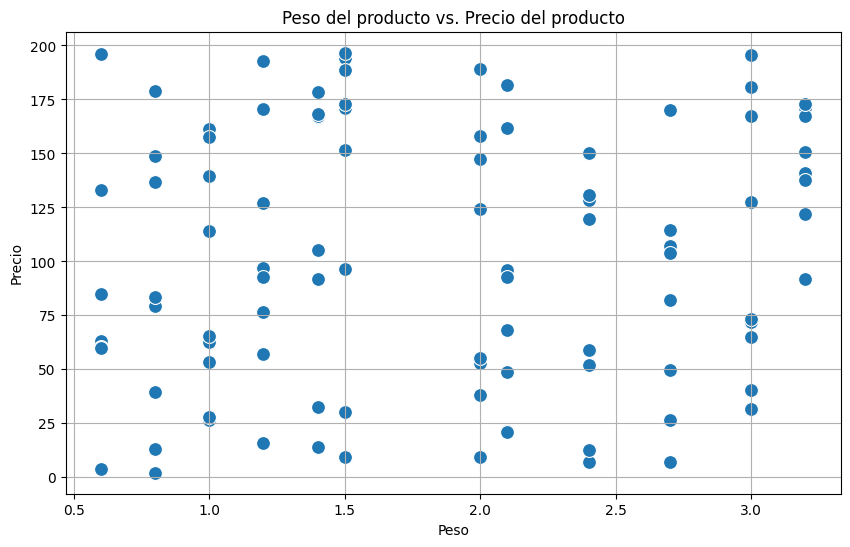

In [17]:
f, ax = plt.subplots(figsize = (10,6))
sns.scatterplot(data= df_products, x = df_products['weight'], y= df_products['price'], palette = palette, s=100)
plt.title('Peso del producto vs. Precio del producto')
plt.xlabel('Peso')
plt.ylabel('Precio')
plt.grid(True, axis='both', which='both')

Se ha graficado la variable Peso frente a la variable Precio utilizando un diagrama de dispersión (scatterplot), donde el eje x representa el peso de los productos y el eje y muestra su precio individual.

Observaciones:

- El gráfico muestra una alta dispersión de los puntos, sin una tendencia lineal o patrón definido que relacione el peso con el precio.
- No se observa una correspondencia proporcional entre ambas variables: productos con pesos similares pueden tener precios muy distintos, y viceversa.
- La distribución sugiere la ausencia de una relación clara o significativa entre el peso y el precio de los productos.

Justificación del gráfico:

Se utiliza un diagrama de dispersión (scatterplot) por ser ideal para analizar la relación entre dos variables numéricas continuas. Permite visualizar si existe una correspondencia proporcional entre el precio individual del producto y el peso del producto, así como detectar posibles anomalías o patrones inusuales.

El gráfico revela una alta dispersión y la ausencia de una tendencia clara entre el precio del producto y el peso de cada producto. Por lo tanto concluimos que no hay ninguna relacion entre el peso y el precio de los productos.

- Ejercicio 3

Una variable categórica.



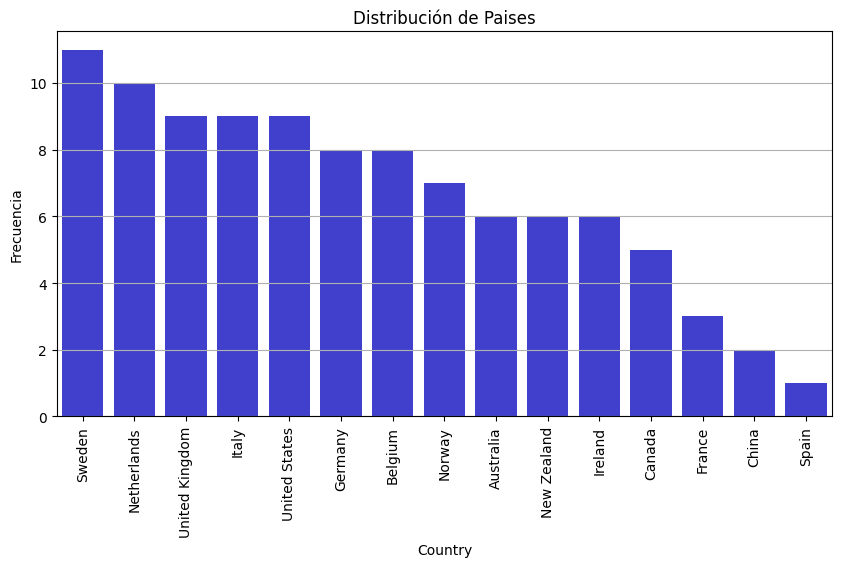

In [18]:
ordenado = df_companies['country'].value_counts().index
f, ax = plt.subplots(figsize = (10,5))
sns.countplot(data=df_companies, x='country', order = ordenado, color= '#2929e4')
plt.title('Distribución de Paises')
plt.xlabel('Country')
plt.ylabel('Frecuencia')
plt.grid(True, axis='y')
plt.xticks(rotation=90);

Se ha representado la variable categórica Country mediante un gráfico de barras (countplot), donde el eje x muestra los 15 países presentes en el conjunto de datos, y el eje y indica la frecuencia (número de compañías) registradas en cada uno.

Observaciones:

- Se visualiza claramente la cantidad de compañías por país, lo que permite identificar rápidamente qué países concentran más empresas en el conjunto analizado.
- Algunos países destacan con un mayor número de compañías, mientras que otros presentan una participación significativamente menor.
- La representación permite una comparación directa entre categorías y la detección de posibles desequilibrios en la distribución geográfica de las compañías.

Justificación del gráfico:

Se utilizó un countplot, que es una de las formas más adecuadas y comunes para visualizar variables categóricas nominales. Esta visualización es útil porque:

- Permite contar y comparar fácilmente la frecuencia de cada categoría,
- Facilita el análisis de la distribución de valores en una variable categórica, y
- Mejora la interpretación visual al resumir la información de manera clara y concisa.


- Ejercicio 4

Una variable categórica y una numérica.

In [44]:
df_comp_trans = df_companies.merge(df_trans_exitosas, left_on='company_id', right_on='business_id')
df_monto_x_pais = df_comp_trans.groupby('country')[['amount']].sum().sort_values(by='amount',ascending= False).reset_index()
df_monto_x_pais

,country,amount
0,Germany,26888.55
1,United Kingdom,25274.38
2,Sweden,18813.45
3,Ireland,16006.22
4,Norway,15318.01
5,Canada,14930.69
6,United States,2587.78
7,Netherlands,2409.40
8,Italy,2190.08
9,Belgium,2041.74


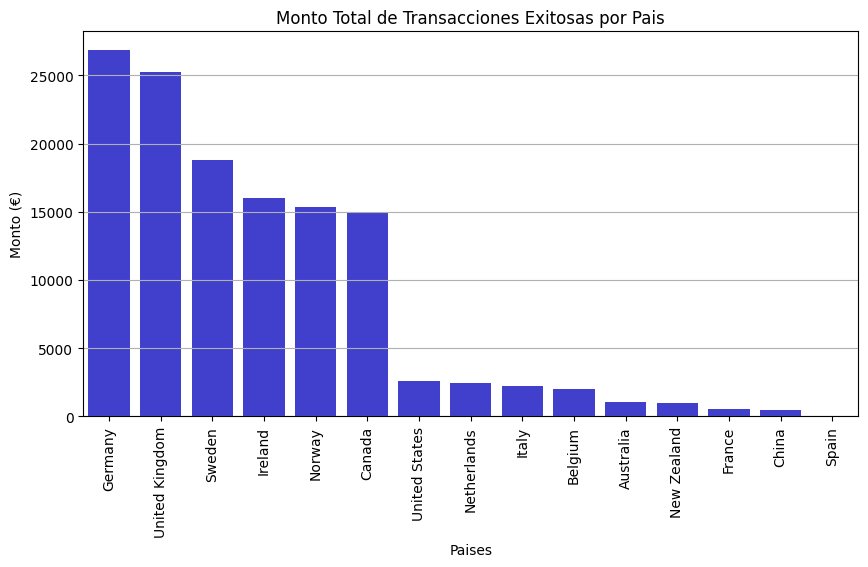

In [21]:
f, ax = plt.subplots(figsize = (10,5))
sns.barplot(data = df_monto_x_pais,y='amount', x= 'country', errorbar=None, order= df_monto_x_pais['country'], color= '#2929e4')
plt.title('Monto Total de Transacciones Exitosas por Pais')
plt.xlabel('Paises')
plt.ylabel('Monto (€)')
plt.grid(True, axis='y')
plt.xticks(rotation=90);

Se ha utilizado un gráfico de barras (barplot) para representar la suma total de montos de transacciones exitosas (monto) en el eje y, agrupadas por país (paises) en el eje x.

Observaciones:

- Este gráfico permite visualizar y comparar el volumen económico de transacciones exitosas por país, más allá de la cantidad de compañías registradas en cada uno.
- Existen diferencias claras entre países, lo que sugiere distintos niveles de actividad económica y participación en el sistema de transacciones.

Justificación del gráfico:

Se eligió un barplot porque se requiere representar una variable numérica agregada (monto total) frente a una variable categórica (país). Este tipo de visualización permite:
- Comparar fácilmente valores agregados entre categorías,
- Identificar concentraciones de actividad económica, y
- Detectar desequilibrios o patrones en la distribución del monto transaccionado por país.

Interpretación:

Este análisis se enfoca en el impacto económico de las compañías por país, a través del total acumulado de transacciones aprobadas. No solo se observa dónde están ubicadas las compañías, sino también cuán activas y relevantes son en términos financieros.

La visualización permite clasificar a los países en tres grupos según su nivel de contribución económica:
- Grupo bajo: 9 países acumulan menos de 5,000 dólares cada uno. Esto sugiere una actividad limitada, posiblemente por menor tamaño de mercado o bajo volumen de      operaciones.
- Grupo medio: 4 países presentan montos entre 15,000 y 20,000 dólares, mostrando una presencia comercial más destacada.
- Grupo alto: Solo 2 países superan los 25,000 dólares, consolidándose como los principales polos de actividad económica dentro del conjunto analizado.

- Ejercicio 5

Dos variables categóricas.

In [22]:
df_users_trans = df_users.merge(df_transactions, left_on='id', right_on='user_id')
df_users_trans.dtypes

id_x                     int64
name                    object
surname                 object
phone                   object
email                   object
birth_date      datetime64[ns]
country               category
city                    object
postal_code             object
address                 object
fecha_actual    datetime64[ns]
edad                     int64
id_y                    object
card_id                 object
business_id             object
timestamp       datetime64[ns]
amount                 float64
declined              category
product_ids             object
user_id                  int64
lat                    float64
longitude              float64
dtype: object

In [23]:
conteos_declined = df_users_trans[['country', 'declined']].value_counts().reset_index()
conteos_declined

,country,declined,count
0,Canada,0,265
1,United States,0,173
2,Canada,1,87
3,United Kingdom,0,62


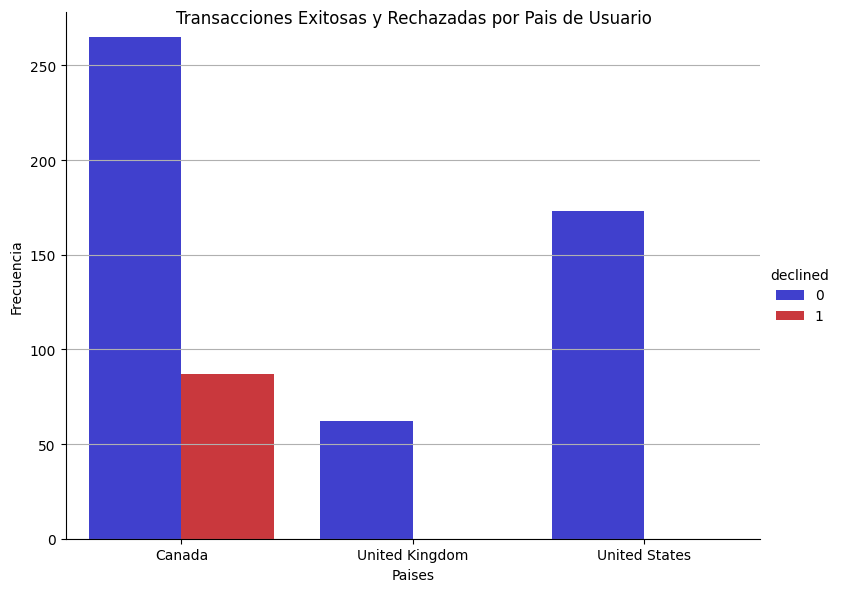

In [24]:
g = sns.catplot(data=conteos_declined, x='country', y= 'count', hue='declined', kind='bar',height=6, aspect=1.3 , palette= palette)
g.figure.suptitle('Transacciones Exitosas y Rechazadas por Pais de Usuario')
g.set_xlabels('Paises')
g.set_ylabels('Frecuencia')
plt.grid(True, axis='y');

Se ha utilizado la grafica catplot tipo Barra para graficar dos variables categoricas : Paises de los usuarios(eje X) y el estado de la transaccion declined que indica si son transacciones rechazadas(1) o son exitosas(0), tambien se muestra la frecuencia de transacciones por cada pais de usuario ( eje Y).

Observaciones:

- Se puede observar que Canadá lidera el ranking con mas transacciones exitosas, seguido de Estados Unidos, mientras que Reino Unido (UK) aparece con la menor cantidad de transacciones.
- Además, se observa que todas las transacciones rechazadas en el dataset pertenecen también a usuarios de Canadá, lo que podría indicar una anomalía, sesgo en los datos o una situación específica de ese país en el proceso de validación.

Justificación del gráfico:

Se utilizó un catplot con barras porque permite representar y comparar de manera efectiva dos variables categóricas. Este tipo de visualización es útil para:
- Analizar la frecuencia de ocurrencia de combinaciones específicas entre categorías (por ejemplo, país + estado de transacción).
- Identificar desequilibrios o concentraciones dentro del conjunto de datos.
- Detectar patrones inusuales, como la concentración de rechazos en un solo país.


- Ejercicio 6

Tres variables.

In [25]:
media_amount = df_comp_trans.groupby('country')[['amount']].mean().reset_index()
media_amount.columns= ['country', 'media']
media_amount = media_amount.round(2)
media_amount

,country,media
0,Australia,177.33
1,Belgium,255.22
2,Canada,261.94
3,China,222.24
4,France,169.41
5,Germany,242.24
6,Ireland,285.83
7,Italy,243.34
8,Netherlands,240.94
9,New Zealand,167.06


In [26]:
df_monto_x_pais

,country,amount
0,Germany,26888.55
1,United Kingdom,25274.38
2,Sweden,18813.45
3,Ireland,16006.22
4,Norway,15318.01
5,Canada,14930.69
6,United States,2587.78
7,Netherlands,2409.40
8,Italy,2190.08
9,Belgium,2041.74


In [27]:
df_monto_media_pais = df_monto_x_pais.merge(media_amount)
df_monto_media_pais=df_monto_media_pais.sort_values(by='amount',ascending= False)
df_monto_media_pais

,country,amount,media
0,Germany,26888.55,242.24
1,United Kingdom,25274.38,271.77
2,Sweden,18813.45,276.67
3,Ireland,16006.22,285.83
4,Norway,15318.01,251.11
5,Canada,14930.69,261.94
6,United States,2587.78,287.53
7,Netherlands,2409.40,240.94
8,Italy,2190.08,243.34
9,Belgium,2041.74,255.22


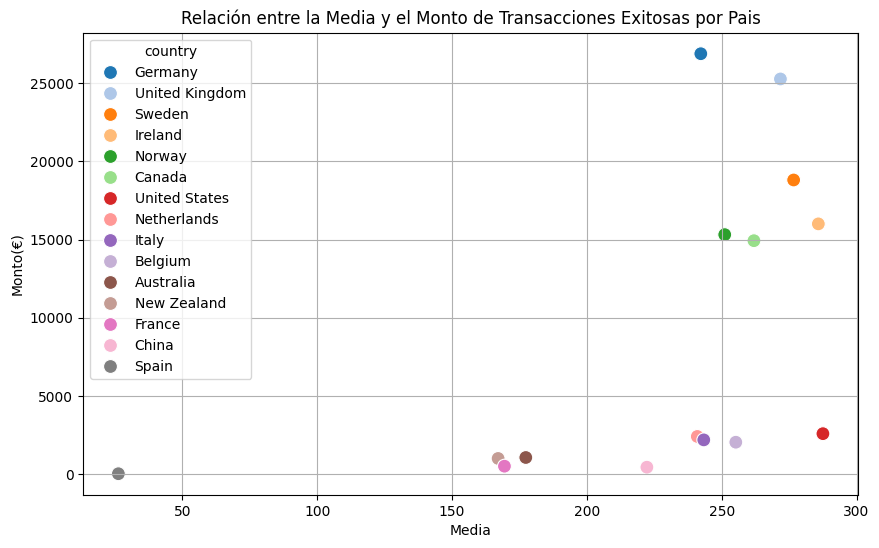

In [28]:
f, ax = plt.subplots(figsize = (10,6))
sns.scatterplot(data=df_monto_media_pais, x='media', y='amount', hue='country', hue_order = df_monto_media_pais['country'], 
                legend= 'auto', palette= 'tab20', s=100)
plt.title('Relación entre la Media y el Monto de Transacciones Exitosas por Pais')
plt.xlabel('Media')
plt.ylabel('Monto(€)')
plt.grid(True, axis='both', which='both');

Se ha utilizado un diagrama de dispersión (scatterplot) para representar la relación entre dos métricas agregadas por país:

El eje x muestra la media del monto por transacción exitosa en euros.

El eje y representa el monto total acumulado de transacciones exitosas en euros.

Cada punto en el gráfico corresponde a un país, identificado por colores distintos en la leyenda.

Observaciones:

- Alemania y Reino Unido destacan como los países con los montos totales más altos en transacciones exitosas, ambos por encima de los 25,000 €, y con una media por transacción cercana o superior a los 270 €.

- Irlanda y Noruega también presentan montos totales elevados (entre 15,000 € y 20,000 €) y una media de transacción entre 260 € y 280 €, lo que los posiciona como mercados relevantes tanto en volumen como en valor promedio.

- Algunos países como Estados Unidos, Italia, Bélgica, y Países Bajos tienen una media alta de transacción (~250 €), pero un monto total bajo (< 5,000 €), lo que sugiere una menor cantidad de transacciones, aunque de valor relativamente alto.

- Otros países (por ejemplo: China, Francia, Australia) se agrupan en la parte inferior izquierda, con bajo monto total y media moderada o baja, reflejando escasa actividad y poco valor económico por transacción.

- España es el único país con un monto total cercano a cero, y también con la media de transacción más baja (alrededor de 30 €), indicando una participación económica mínima.

Justificación del gráfico:

Se eligió un scatterplot porque permite analizar de forma visual la relación entre tres variables numéricas continuas: la media por transacción y el monto total transaccionado y el pais correspondiente. Esta visualización es útil para:

- Identificar agrupamientos de países con comportamientos similares
- Detectar outliers o líderes en volumen y valor (como Alemania o UK)
- Evaluar la eficiencia económica por país (relación entre cantidad y calidad de las transacciones).

- Ejercicio 7

Graficar un Pairplot.

In [29]:
# Se hace merge con outer para ver todas las filas y asi poder obtener acceso a las que no generan transacciones y por lo tanto los producto no comprados
df_pro_tran_total = df_transactions.merge(df_trans_product, left_on='id', right_on='id', how='outer')
df_pro_tran_total = df_pro_tran_total.merge(df_products, left_on='producto', right_on='id',how='outer')
df_pro_tran_total.tail() # tail para observar una muestra de los valores nulos que corresponden a los productos no comprados

,id_x,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude,producto,id_y,product_name,price,colour,weight,warehouse_id
1526,F85A7D75-2778-9D75-D776-3F41A828DE88,CcU-3393,b-2346,2021-10-10 01:46:36,135.93,0,"23, 97, 31, 3",101.0,24.1698,88.2782,97.0,97,jinn Winterfell,65.25,#bababa,1.0,WH--92
1527,FBD7E0D6-BA6B-F5BC-0CA9-EA4B8760100C,CcU-3281,b-2418,2021-04-29 14:17:50,207.09,1,"97, 83, 29",272.0,83.6756,-77.4352,97.0,97,jinn Winterfell,65.25,#bababa,1.0,WH--92
1528,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98,Direwolf Littlefinger,38.33,#bababa,2.0,WH--93
1529,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99,the duel,151.78,#212121,1.5,WH--94
1530,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,south duel,40.43,#6d6d6d,3.0,WH--95


In [30]:
seleccion = df_pro_tran_total[['amount', 'price', 'weight']]
seleccion

,amount,price,weight
0,466.92,161.11,1.0
1,172.01,161.11,1.0
2,497.84,161.11,1.0
3,200.04,161.11,1.0
4,274.15,161.11,1.0
...,...,...,...
1526,135.93,65.25,1.0
1527,207.09,65.25,1.0
1528,NaN,38.33,2.0
1529,NaN,151.78,1.5


In [31]:
seleccion['amount'] = seleccion['amount'].fillna('0')
seleccion['amount'] = seleccion['amount'].astype('float64')
seleccion['No_Comprado'] = seleccion["amount"] == 0
seleccion

,amount,price,weight,No_Comprado
0,466.92,161.11,1.0,False
1,172.01,161.11,1.0,False
2,497.84,161.11,1.0,False
3,200.04,161.11,1.0,False
4,274.15,161.11,1.0,False
...,...,...,...,...
1526,135.93,65.25,1.0,False
1527,207.09,65.25,1.0,False
1528,0.00,38.33,2.0,True
1529,0.00,151.78,1.5,True


In [32]:
#numero de productos nunca comprados
nveces_prod=df_pro_tran_total.groupby('id_y')[['id_x']].count().reset_index()
prod_no_comprados = nveces_prod['id_x'].value_counts()
print(f'{prod_no_comprados[0]} Productos no Comprados')

74 Productos no Comprados


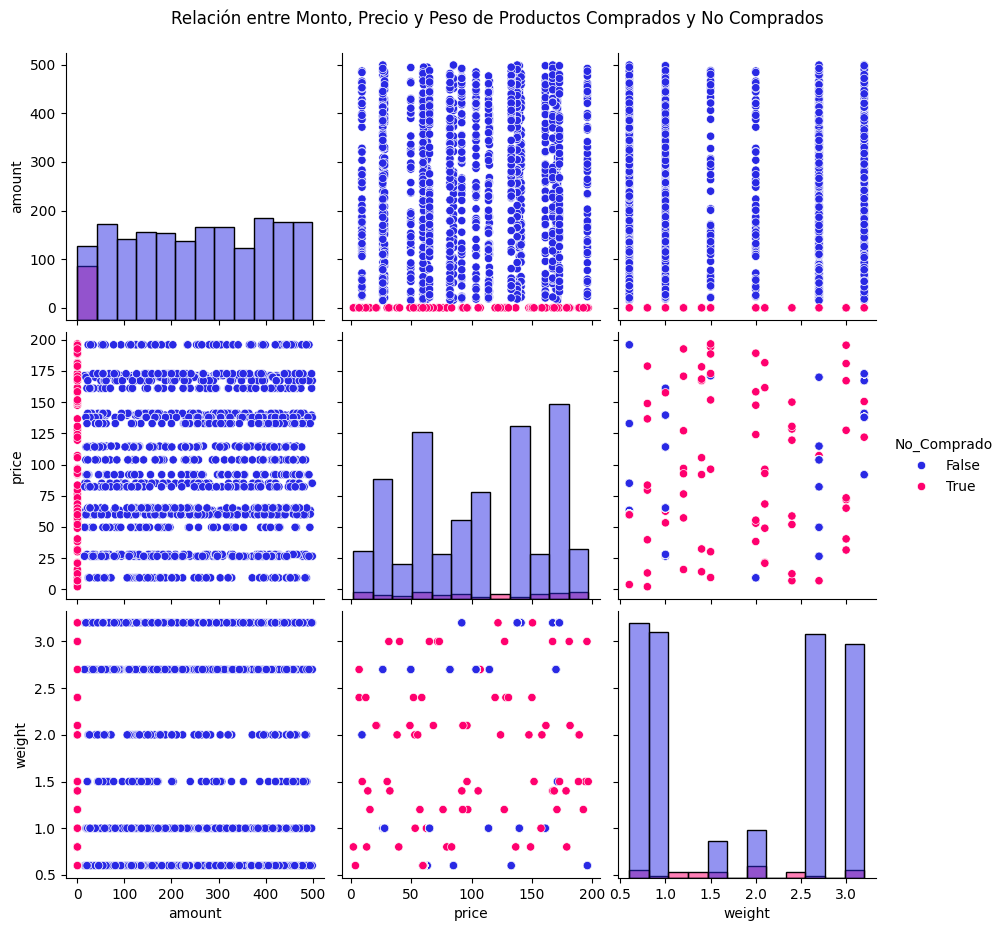

In [33]:
g=sns.pairplot(data= seleccion, hue= 'No_Comprado', palette={False: '#2929e4', True: '#ff006e'}, diag_kind = 'hist', height=3)
g.figure.suptitle('Relación entre Monto, Precio y Peso de Productos Comprados y No Comprados', y=1.03);

Para poder visualizar los productos no comprados, que no generan transacciones, hemos imputado los valor nulos por el valor de cero('0'), de este modo y graficamente podemos observar su interaccion con la variable amount.

Se ha utilizado un gráfico pairplot para analizar la relación entre tres variables numéricas continuas:Monto (amount), Precio (price), Peso (weight) y estas se segmentan por la variable categórica No_Comprado, que indica si un producto no fue comprado (True) o sí fue comprado (False).
El gráfico muestra tanto las distribuciones individuales de cada variable (en la diagonal) como las relaciones bivariadas entre ellas (en los gráficos fuera de la diagonal), permitiendo comparar visualmente los patrones entre los dos grupos.

Observaciones:

La mayoría de los puntos azules (productos comprados) se concentran en todos los gráficos, lo que sugiere un fuerte desbalance de clases, con muchos más productos comprados que no comprados.
En la diagonal, los histogramas muestran que:

- El amount (monto) se distribuye ampliamente entre 0 y 500 €, sin valores atípicos visibles.
- El price tiene más concentración entre 50 y 200 €.
- El weight se agrupa en valores desde 0.5 hasta poco mas de 3.

En los gráficos de dispersión:

- No se observa una relación clara entre monto y precio, aunque los productos comprados aparecen de forma más continua.
- Entre precio y peso, los productos no comprados (rojo) están dispersos en varias combinaciones, pero no siguen un patrón claro, lo cual sugiere que no hay relación evidente entre peso y decisión de compra.
- Tampoco se distingue una correlación entre monto y peso.

Justificación del gráfico:

Se utilizó un pairplot para analizar múltiples variables numéricas y su relación entre sí, además de permitir observar diferencias entre categorías (No_Comprado).
Este tipo de gráfico es útil para:

- Explorar posibles correlaciones entre variables numéricas.
- Detectar agrupamientos, dispersión o patrones diferenciados según una variable categórica.
- Evaluar distribuciones individuales y detectar anomalías o valores extremos.
- Comparar visualmente los productos comprados vs. no comprados en distintas dimensiones.

Nivell 2

Exercicio 1

Correlación de todas las variables numéricas.

In [34]:
df_pro_tran_exito = df_trans_exitosas.merge(df_trans_product, left_on='id', right_on='id')
df_pro_tran_exito = df_pro_tran_exito.merge(df_products, left_on='producto', right_on='id')
df_pro_tran_exito_users = df_pro_tran_exito.merge(df_users, left_on='user_id', right_on='id')

df_numericas = df_pro_tran_exito_users.select_dtypes(include=['int64', 'float64'])
df_numericas = df_pro_tran_exito_users[['amount', 'price', 'weight', 'lat', 'longitude', 'edad']]
df_numericas

,amount,price,weight,lat,longitude,edad
0,499.23,167.20,3.2,36.6100,83.1953,33
1,499.23,85.02,0.6,36.6100,83.1953,33
2,499.23,137.81,3.2,36.6100,83.1953,33
3,499.23,26.51,2.7,36.6100,83.1953,33
4,497.84,161.11,1.0,57.9422,-114.7290,42
...,...,...,...,...,...,...
1231,17.97,103.73,2.7,20.6724,14.9732,24
1232,15.90,85.02,0.6,83.2354,-92.6384,36
1233,15.90,59.80,0.6,83.2354,-92.6384,36
1234,15.90,82.15,2.7,83.2354,-92.6384,36


In [35]:
# Test de normalidad a las variables de df_numericas, pra averificar si sigue una distribucion normal
for col in df_numericas.columns:
    stat, p = stats.shapiro(df_numericas[col].dropna())
    print(f'Columna: {col} - stat={stat:.3f}, p={p:.3f}')
    if p > 0.05:
        print("Probable distribución normal\n")
    else:
        print("Probablemente NO sigue distribución normal\n")

Columna: amount - stat=0.949, p=0.000
Probablemente NO sigue distribución normal

Columna: price - stat=0.934, p=0.000
Probablemente NO sigue distribución normal

Columna: weight - stat=0.806, p=0.000
Probablemente NO sigue distribución normal

Columna: lat - stat=0.960, p=0.000
Probablemente NO sigue distribución normal

Columna: longitude - stat=0.950, p=0.000
Probablemente NO sigue distribución normal

Columna: edad - stat=0.956, p=0.000
Probablemente NO sigue distribución normal



Como el test de normalidad mostró que los datos no siguen una distribución normal, no es adecuado usar la correlación de Pearson, que requiere normalidad. Por eso, se utiliza la correlación no paramétrica de Spearman, que no depende de esta suposición y es más adecuada para datos no normales.

In [36]:
matriz=df_numericas.corr(method='spearman')
matriz

,amount,price,weight,lat,longitude,edad
amount,1.000000,-0.000481,-0.035193,0.077869,0.040904,0.016702
price,-0.000481,1.000000,0.256367,-0.036512,0.023049,0.029480
weight,-0.035193,0.256367,1.000000,0.005884,-0.042096,0.035908
lat,0.077869,-0.036512,0.005884,1.000000,-0.016685,0.023685
longitude,0.040904,0.023049,-0.042096,-0.016685,1.000000,-0.053014
edad,0.016702,0.029480,0.035908,0.023685,-0.053014,1.000000


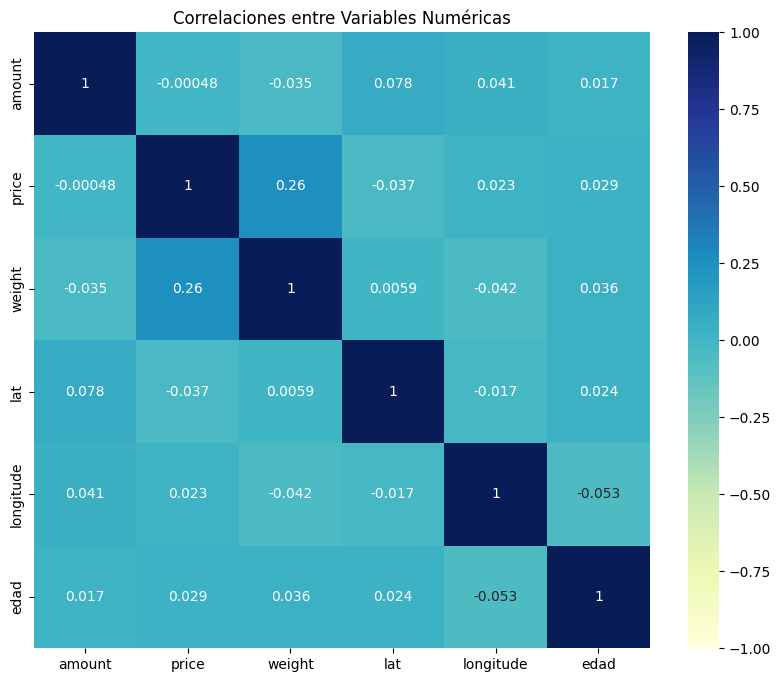

In [37]:
f, ax = plt.subplots(figsize = (10,8))
sns.heatmap(matriz, vmin = -1, vmax = 1, annot=True, square=True, cmap="YlGnBu")
plt.title('Correlaciones entre Variables Numéricas');

Se ha utilizado un gráfico de mapa de calor (heatmap) para representar visualmente las correlaciones entre las variables numéricas del dataset:

amount (monto de transacción)
price (precio del producto)
weight (peso del producto)
lat (latitud)
longitude (longitud)
edad (edad del usuario)

Observaciones:

- Las variables numéricas en general presentan correlaciones muy débiles o nulas entre sí, como puede observarse por la predominancia de colores claros en el gráfico.
- La única relación ligeramente destacable es una correlación positiva entre el peso y el precio, con una magnitud de 0.26, lo que sugiere que productos más pesados tienden a tener un precio ligeramente mayor.
- El resto de relaciones, como entre amount y las otras variables, o entre edad y price, presentan valores cercanos a cero, lo que indica ausencia de asociación lineal.

Justificación del gráfico:
El heatmap de correlaciones es una herramienta fundamental para explorar la fuerza y dirección de las relaciones lineales entre variables numéricas.

Cada celda del gráfico muestra:

- Un color cuya intensidad refleja el grado de correlación: más oscuro implica mayor correlación (positiva o negativa).
- Un valor numérico que cuantifica la magnitud de la correlación, variando entre -1 y 1.

Este tipo de visualización permite:

- Identificar rápidamente relaciones significativas que podrían usarse en modelos predictivos.
- Detectar multicolinealidad en variables numéricas.

En este caso, la visualización permite confirmar que no existe una estructura fuerte entre las variables analizadas, por lo que cada una aporta información relativamente independiente.

Ejercicio 2

Implementa un jointplot.

In [38]:
df_users_trans = df_users.merge(df_transactions, left_on='id', right_on='user_id')
df_users_trans.dtypes

id_x                     int64
name                    object
surname                 object
phone                   object
email                   object
birth_date      datetime64[ns]
country               category
city                    object
postal_code             object
address                 object
fecha_actual    datetime64[ns]
edad                     int64
id_y                    object
card_id                 object
business_id             object
timestamp       datetime64[ns]
amount                 float64
declined              category
product_ids             object
user_id                  int64
lat                    float64
longitude              float64
dtype: object

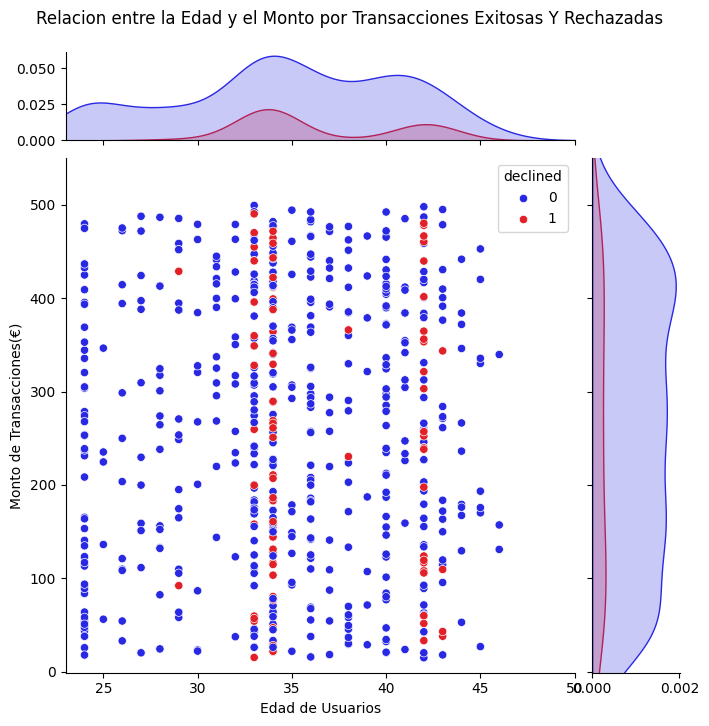

In [39]:
g = sns.jointplot(df_users_trans, y='amount', x='edad', hue='declined',marginal_ticks=True, palette= palette, height=7)
plt.suptitle("Relacion entre la Edad y el Monto por Transacciones Exitosas Y Rechazadas", y=1.03)
g.ax_joint.set_xlabel('Edad de Usuarios')
g.ax_joint.set_ylabel('Monto de Transacciones(€)')
g.ax_joint.set_xlim(23, 50)
g.ax_joint.set_ylim(-1,550);

Se ha utilizado un Jointplot para visualizar la relación entre dos variables numéricas: amount (Monto de transacciones) y edad (Edad de los usuarios),la visualización se segmenta por la variable categórica declined, que indica si una transacción fue rechazada (1) o es exitosa (0), mediante un Scatterplot en el centro.
Además, en los márgenes del gráfico se incluyen distribuciones de densidad (KDE) para ambas variables, permitiendo observar su comportamiento individual por grupo.

Observaciones:

- En el gráfico principal se aprecia una alta dispersión de los puntos, sin una relación lineal evidente entre la edad del usuario y el monto transaccionado.
- Se identifican tres concentraciones destacadas de transacciones rechazadas, correspondientes a las edades de 33, 34 y 42 años, ya detectadas en análisis previos como asociadas a usuarios del país Canadá. Sin embargo, estas edades no presentan un rango específico de montos, ya que están distribuidas de forma amplia.
- En el gráfico marginal de la variable edad, la distribución de transacciones exitosas es multimodal, mientras que la de transacciones rechazadas es bimodal, con picos justamente en las edades mencionadas.
- El gráfico marginal de la variable amount revela una distribución multimodal en ambos casos, sin presencia visible de outliers.

Justificación del gráfico:

El Jointplot es una herramienta gráfica muy útil para analizar relaciones bivariadas entre dos variables numéricas, al mismo tiempo que se muestra la distribución individual de cada una en los ejes correspondientes.
La inclusión del parámetro hue permite diferenciar categorías dentro de los datos (en este caso, transacciones exitosas vs. rechazadas), lo cual enriquece el análisis al evidenciar patrones diferenciados por grupo.
Además, el uso de gráficos KDE en los márgenes facilita la interpretación de la distribución de los datos, permitiendo detectar acumulaciones, modas y anomalías con mayor claridad.

Nivel 3

Ejercicio 1

Implementa un violinplot combinado con otro tipo de gráfico.


In [40]:
df_users_trans.head(1)

,id_x,name,surname,phone,email,birth_date,country,city,postal_code,address,...,id_y,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude
0,60,Roth,Cook,(122) 759-2618,ullamcorper.eu@icloud.edu,1996-11-23,United States,Aurora,26839,Ap #815-8102 Ante. St.,...,8BCE9908-6D44-B7DB-D363-D468A2DF3A25,CcU-4093,b-2362,2022-02-16 21:45:08,156.23,0,"37, 67, 23, 83",60,-0.195018,22.3898


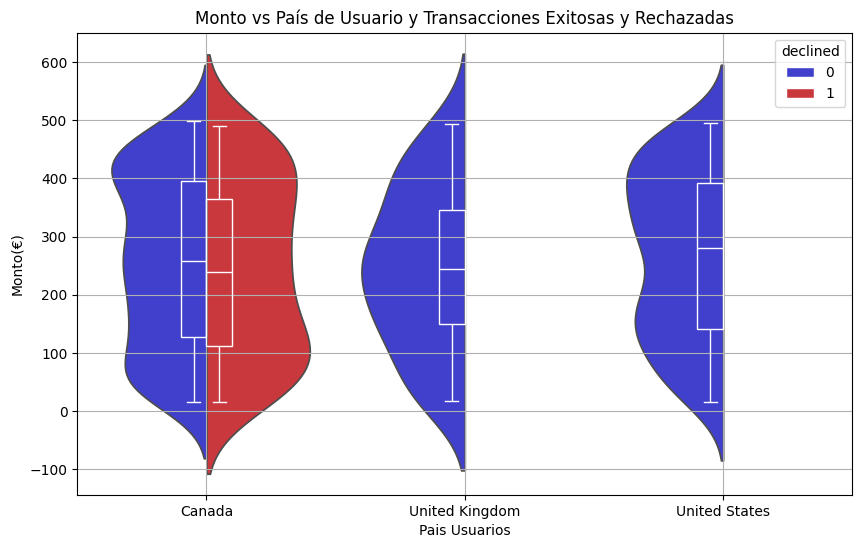

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(df_users_trans, y='amount', x='country', hue='declined',split=True, inner=None, palette= {0 : '#2929e4', 1 :'#e12027'})
sns.boxplot(df_users_trans, y='amount', x='country', hue='declined',dodge=True, width=0.2, showcaps=True,showfliers=False,
            palette= {0 : '#2929e4', 1 :'#e12027'},
            boxprops=dict(facecolor='None', edgecolor= 'white'),
            medianprops=dict(color='white'),
            whiskerprops=dict(color='white'),
            capprops=dict(color='white'))
plt.title('Monto vs País de Usuario y Transacciones Exitosas y Rechazadas')
plt.xlabel('Pais Usuarios')
plt.ylabel('Monto(€)')
plt.grid(True, axis='both', which='both');

handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
plt.legend(unique.values(), unique.keys(), title='declined');


Justificación del gráfico:

Se grafica mediante una grafica de Violines ( Violinplot) combinada con un Grafico de Cajas( Boxplot) la relacion de Monto de transacciones entre el pais del Usuario segmentada por declined en la leyenda exitosas(0) y rechazadas(1).

- El violinplot permite observar la forma y densidad de la distribución.
- El boxplot facilita la identificación de valores clave como la mediana, cuartiles y valores atípicos.

Esta combinación ofrece una visión más completa de las diferencias en comportamiento por país.

Observaciones:

- Canadá es el único país con transacciones rechazadas, lo que sugiere un patrón específico en sus usuarios que justifica un análisis adicional.
- Estados Unidos muestra una distribución bimodal, con picos en torno a 150€ y 400€, y alta dispersión.
- Reino Unido presenta una distribución unimodal, concentrada entre 200€ y 300€, con menor variabilidad.
- Canadá tiene una distribución heterogénea, con varios picos (antes de 100€, cerca de 250€, y sobre 400€), lo que refleja una alta diversidad en los montos de compra aprobados.




Ejercicio 2

Genera un FacetGrid para visualizar múltiples aspectos de datos simultáneamente.

In [42]:
df_users_trans.dtypes

id_x                     int64
name                    object
surname                 object
phone                   object
email                   object
birth_date      datetime64[ns]
country               category
city                    object
postal_code             object
address                 object
fecha_actual    datetime64[ns]
edad                     int64
id_y                    object
card_id                 object
business_id             object
timestamp       datetime64[ns]
amount                 float64
declined              category
product_ids             object
user_id                  int64
lat                    float64
longitude              float64
dtype: object

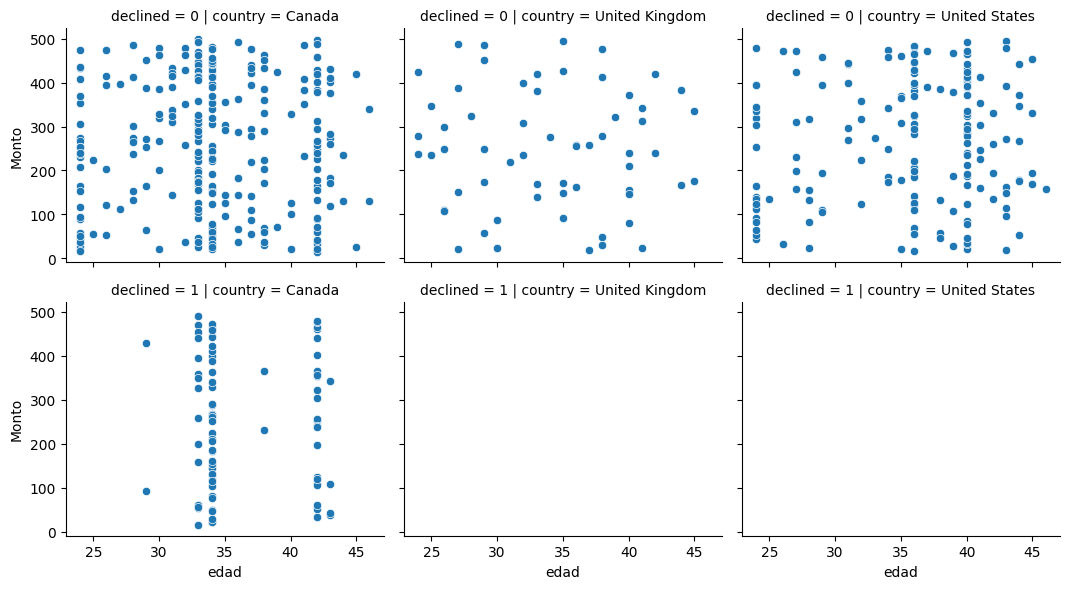

In [43]:
g=sns.FacetGrid(df_users_trans, col='country', row='declined', height=3, aspect=1.2, palette=palette)
g.map(sns.scatterplot, 'edad', 'amount' )
g.set_axis_labels("edad", "Monto")
g.tight_layout();


Justificación del gráfico: 

Se utilizó un FacetGrid para visualizar la relación entre variables numericas continuas: la edad del usuario y el monto de la transacción, segmentando los datos por país y por el estado de la transacción (declined: 0 = exitosa, 1 = rechazada).

Esta técnica permite comparar patrones de comportamiento entre múltiples grupos de manera clara y simultánea.
Cada panel representa un subconjunto de datos, facilitando el análisis cruzado entre variables categóricas como país y estado de transacción.

Observaciones:

Transacciones aprobadas (declined = 0):

- Canadá y Estados Unidos muestran una gran dispersión de montos en todos los rangos de edad, sin una tendencia clara entre edad y monto.
- Reino Unido presenta menor cantidad de datos, pero se observa una concentración de montos bajos entre los 25 y 45 años.

Transacciones rechazadas (declined = 1):

- Solo Canadá tiene transacciones rechazadas; Reino Unido y Estados Unidos no registran ninguna en esta categoría.
- En Canadá, los montos rechazados también están dispersos, pero se concentran entre los 30 y 40 años.